Pyber Ride Sharing HW

Observable Trend 1: Per the scatterplot analysis, there are a greater number of rides occurring in urban city type areas with a relatively cheaper price than that of rural and suburban city types. Here you can see an example of supply and demand since there are more rides occurring in an urban area the competition becomes saturated bringing prices down and vice versa for other city types.

Observable Trend 2: The city type that brought in the most fares is attributed to the Urban city type again. Per the scatter plot and pie chart one can come to a conclusion that this would be the city type to bring in the most fares. 

Observable Trend 3: Nearly 80% of drivers are in urban areas. Perhaps the business should pursue other opportunities in the areas where the demand isnt great such as rural areas. This could be a challenge to a business but it can potentially lead to more profitability and job opportunities for others. 

In [64]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#read csv files
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

#merge files together by finding matching city values from the ride df against city_df
merged_df = pd.merge(ride_df, city_df, how="left", on="city")


In [65]:
#show merged dataframe
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [66]:
#filter merged dataframe by type

urban = merged_df[merged_df["type"] == "Urban"]
suburban = merged_df[merged_df["type"] == "Suburban"]
rural = merged_df[merged_df["type"] == "Rural"]


In [67]:
#perform calculations by filtered city type 

urban_ride_count = urban.groupby("city").count()["ride_id"]
urban_avg_fare = urban.groupby("city").mean()["fare"]
urban_driver_count = urban.groupby("city").mean()["driver_count"]

suburban_ride_count = suburban.groupby("city").count()["ride_id"]
suburban_avg_fare = suburban.groupby("city").mean()["fare"]
suburban_driver_count = suburban.groupby("city").mean()["driver_count"]

rural_ride_count = rural.groupby("city").count()["ride_id"]
rural_avg_fare = rural.groupby("city").mean()["fare"]
rural_driver_count = rural.groupby("city").mean()["driver_count"]

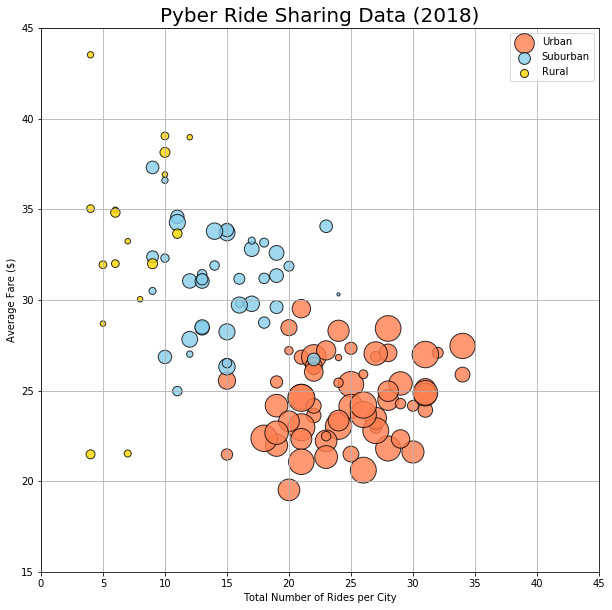

In [68]:
#scatter plot
plt.figure(figsize=(10,10))   

plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidth=1,
            marker="o", alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidth=1,
            marker="o", alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidth=1,
            marker="o", alpha=0.8, label="Rural")
plt.legend(loc="best")
plt.title('Pyber Ride Sharing Data (2018)', fontsize=20)
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Average Fare ($)')
plt.xlim(0,45)
plt.ylim(15,45)
plt.grid()
plt.show()

In [69]:
df_citytype = merged_df.groupby(["type"])

city_summary_table = pd.DataFrame({
                           "Total Fares by City Type": df_citytype["fare"].sum()
})
city_summary_table

,Total Fares by City Type
type,
Rural,4255.09
Suburban,20335.69
Urban,40078.34


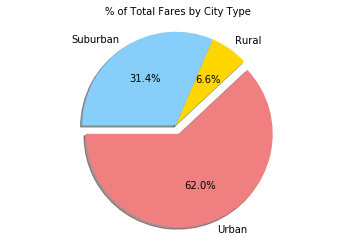

In [70]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural","Suburban"]

# The values of each section of the pie chart
values = [40078.34, 4255.09, 20335.69]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(values, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('% of Total Fares by City Type', fontsize=10)
plt.axis("equal")
plt.show()


In [71]:
df_ridetype = merged_df.groupby(["type"])

rider_summary_table = pd.DataFrame({
                           "Total Rides by City Type": df_ridetype["ride_id"].count()
})

rider_summary_table

,Total Rides by City Type
type,
Rural,125
Suburban,657
Urban,1625


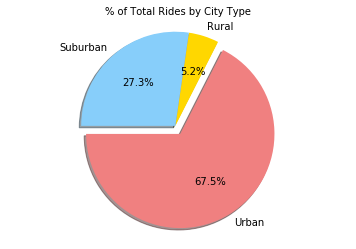

In [72]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural","Suburban"]

# The values of each section of the pie chart
values = [1625, 125, 657]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(values, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('% of Total Rides by City Type', fontsize=10)
plt.axis("equal")
plt.show()

In [73]:
urban_driver_count = urban.groupby("city").mean()["driver_count"]
suburban_driver_count = suburban.groupby("city").mean()["driver_count"]
rural_driver_count = rural.groupby("city").mean()["driver_count"]

total_urban_driver = urban_driver_count.sum()
total_suburban_driver = suburban_driver_count.sum()
total_rural_driver = rural_driver_count.sum()

driver_summary_table = pd.DataFrame({
                           "Total urban driver": [total_urban_driver],
                           "Total Surburban driver":[total_suburban_driver],
                           "Total Rural Driver": [total_rural_driver]        
})
driver_summary_table


,Total Rural Driver,Total Surburban driver,Total urban driver
0,104.0,629.0,2607.0


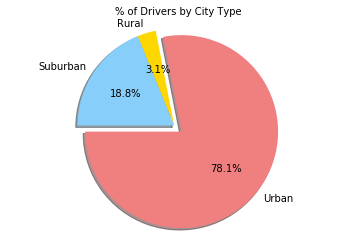

In [74]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural","Suburban"]

# The values of each section of the pie chart
values = [2607, 104, 629]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(values, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('% of Drivers by City Type', fontsize=10)
plt.axis("equal")
plt.show()